In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

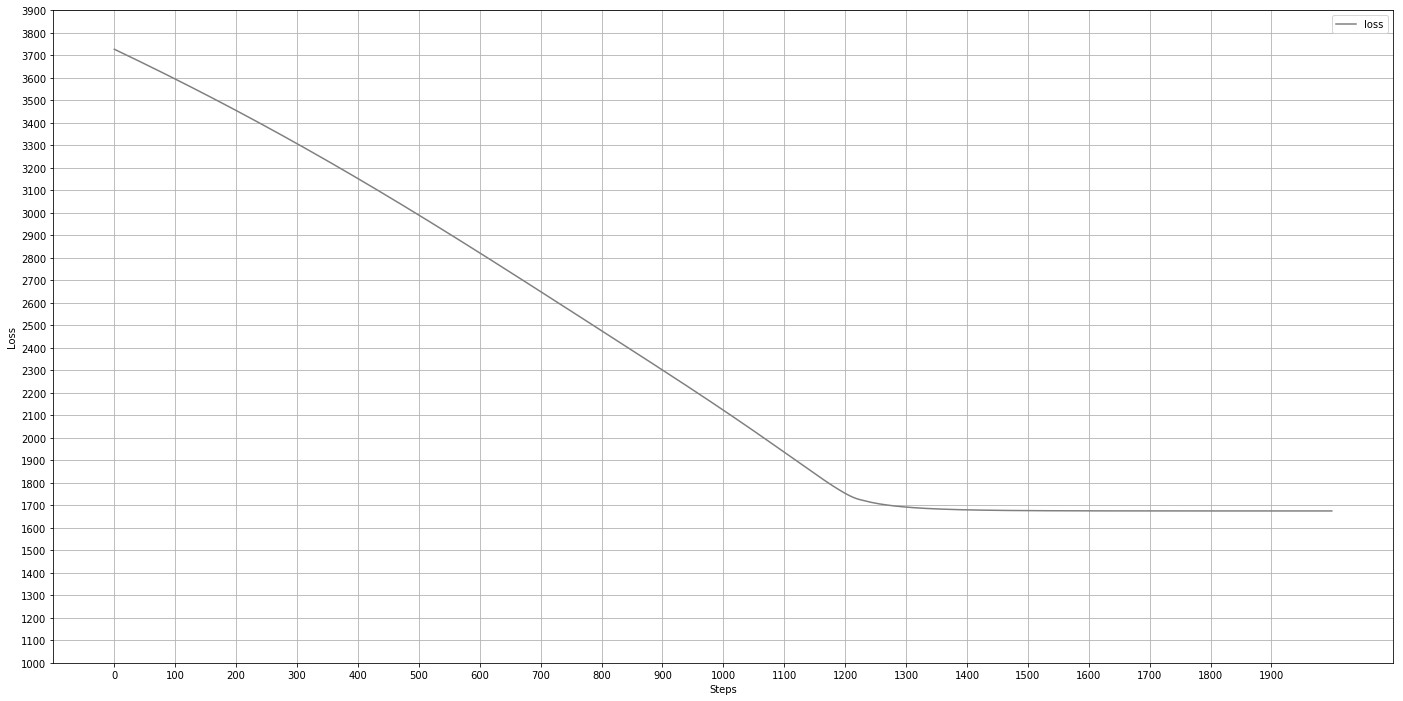

In [17]:
#I0122 20:07:01.184773 139721819879168 basic_session_run_hooks.py:260] gamma = [-0.5441], loss = 454.95105, sigma = [1.3292], step = 1499, threshold = [2.8507] (0.226 sec)            
            
import matplotlib.pyplot as plt

import re
import numpy as np
from pathlib import Path

%matplotlib inline

logfile = "__LOSS_LOG__"

def plot_loss(files):
    step = []
    loss = []

    p = re.compile('.*loss = .*')
    p1 = re.compile('.*NaN.*')

    for file in files:
        with open(file) as f:
            lines = f.readlines()
            for line in lines:
                if not p.match(line):
                    continue               
                if p1.match(line):
                    continue
                items = re.split(" +", line)
                if (items[7] != 'loss'):
                    continue
                step.append(int(items[15].split(',')[0]))
                loss_value=float(items[9].split(',')[0])
                loss.append(loss_value)
          
    p1, = plt.plot(step, loss, color='grey',label='loss')
    
    plt.xlabel("Steps")
    plt.ylabel("Loss")
    plt.legend(handles=[p1],labels=['loss'],loc='best')
    plt.xticks(np.arange(0, 2000, 100))
    plt.yticks(np.arange(1000, 4000, step=100))
    plt.grid(True, which='both')
    #plt.minorticks_on()
    plt.show()
    
fig = plt.figure(figsize=(24,12))
plot_loss([logfile])